In [1]:
# Exploratory Data Analysis
# Bi-variate Data Analysis

# Exploratory Data Analysis Purpose:
# • Understanding the distributions of the variables
# • Understanding the relationships between two or more variables
# • Detecting patterns that can't be found using numerical calculations
# • Spotting anomalies or outliers in the data
# • Formulating a hypothesis about causal relationships
# • Informing us about how to engineer new variables (feature engineering)
# • Informing us about possible formal inferential statistical tests

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%cd "C:\Users\jwill\Documents\Machine Learning\Data"

C:\Users\jwill\Documents\Machine Learning\Data


In [3]:
# load data
games = pd.read_csv('appstore_games2.csv')

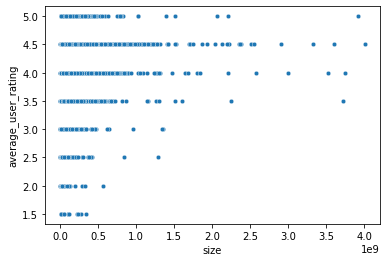

In [4]:
# Scatterplots

#size vs rating scatterplot
sns.scatterplot(x='size', y='average_user_rating',\
                data=games, \
                # this is for controlling the size of the points
                s=20);

In [9]:
# created a new average user rating scale that uses categorical variables
ratings_mapping = {1.5: '1_poor', 2.: '1_poor',\
                   2.5: '1_poor', 3: '1_poor',\
                   3.5: '2_fair', 4. : '2_fair',\
                   4.5: '3_good',5. : '4_excellent'}
games['cat_rating'] = games['average_user_rating']\
                      .map(ratings_mapping)

In [10]:
games['cat_rating']

0            2_fair
1            2_fair
2            1_poor
3            2_fair
4            1_poor
           ...     
4306    4_excellent
4307         3_good
4308    4_excellent
4309    4_excellent
4310    4_excellent
Name: cat_rating, Length: 4311, dtype: object

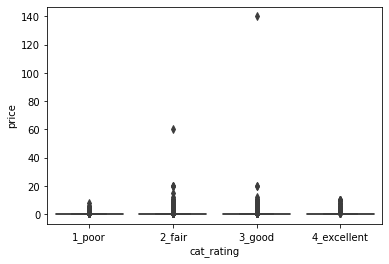

In [19]:
# box plot for ratings
sns.boxplot(x='cat_rating', y='price', \
            data=games[games['price'] <= 6000], \
            order=['1_poor', '2_fair', '3_good', '4_excellent']);

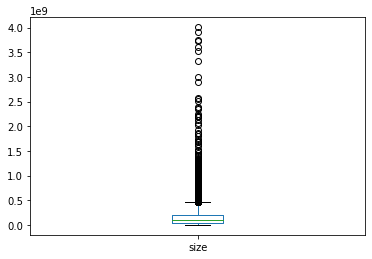

In [22]:
games['size'].plot(kind='box');

In [23]:
# Contingency Table / Cross Tab
#  counts how many observations we have in each combination of the values of our two variables
pd.crosstab(games['age_rating'], games['cat_rating'])

cat_rating,1_poor,2_fair,3_good,4_excellent
age_rating,,,,
12+,57,327,466,75
17+,11,59,68,13
4+,238,821,1029,199
9+,57,309,499,83


In [24]:
# Normalize to show percentages
100*pd.crosstab(games['age_rating'],\
                games['cat_rating'], \
                normalize='index')

cat_rating,1_poor,2_fair,3_good,4_excellent
age_rating,,,,
12+,6.162162,35.351351,50.378378,8.108108
17+,7.284768,39.072848,45.033113,8.609272
4+,10.406646,35.898557,44.993441,8.701355
9+,6.012658,32.594937,52.637131,8.755274


In [25]:
# Exercise/Example 7.03

# list all the unique values for price
games['price'].unique()

array([  2.99,   1.99,   0.  ,   0.99,   5.99,   7.99,   4.99,   3.99,
         9.99,  19.99,   6.99,  11.99,   8.99, 139.99,  14.99,  59.99])

In [27]:
# round the numbers (e.g., 2.99 becomes 3)
games['price'] = games['price'].round()
games['price'].unique()

array([  3.,   2.,   0.,   1.,   6.,   8.,   5.,   4.,  10.,  20.,   7.,
        12.,   9., 140.,  15.,  60.])

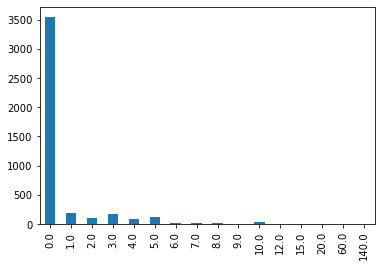

In [28]:
games['price'].value_counts().sort_index().plot(kind='bar');

In [29]:
# create catagories 'free' and 'paid'
games['cat_price'] = (games['price'] == 0).astype(int)\
                      .map({0:'paid', 1:'free'})

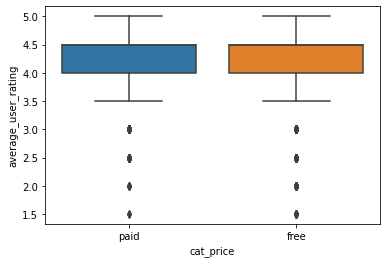

In [30]:
sns.boxplot(x='cat_price', y='average_user_rating', \
            data=games);